Liczba wyrzucenia takiej samej liczby oczek dla 5 rzutów wynosi 2
Liczba wyrzucenia takiej samej liczby oczek dla 100 rzutów wynosi 12
Liczba wyrzucenia takiej samej liczby oczek dla 10000 rzutów wynosi 1708


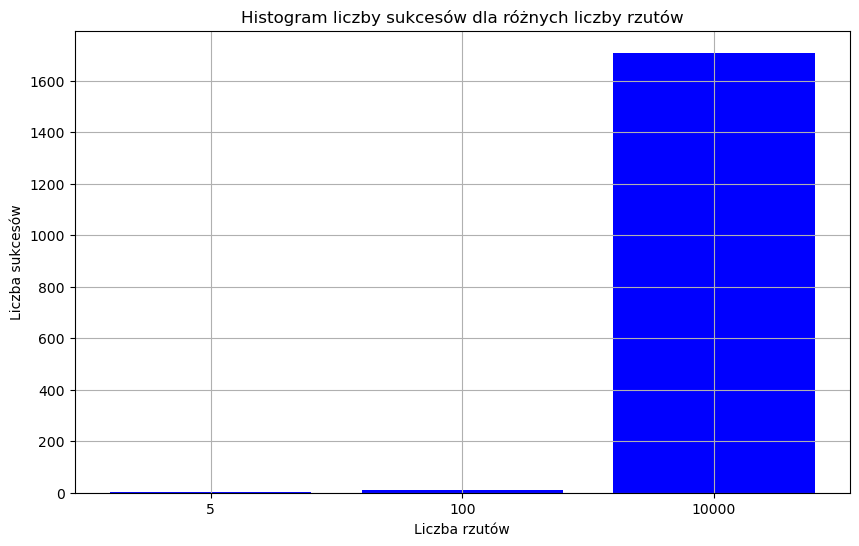

In [17]:
# Zadanie 1

import numpy as np
import matplotlib.pyplot as plt

trials = [5, 100, 10000]

results = []

for trial in trials:
    successes = 0
    for _ in range(trial):
        roll1 = np.random.randint(1, 7)
        roll2 = np.random.randint(1, 7)
        if roll1 == roll2:
            successes += 1
    results.append(successes)
    print(f'Liczba wyrzucenia takiej samej liczby oczek dla {trial} rzutów wynosi {successes}')

plt.figure(figsize=(10, 6))
plt.bar([str(trial) for trial in trials], results, color='blue')
plt.title('Histogram liczby sukcesów dla różnych liczby rzutów')
plt.xlabel('Liczba rzutów')
plt.ylabel('Liczba sukcesów')
plt.grid(True)
plt.show()

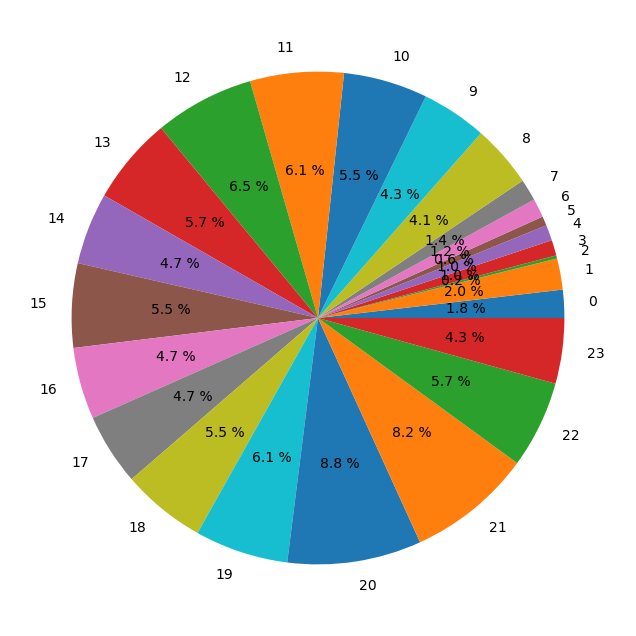

In [47]:
# Zadanie 2

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zamowienia.csv', sep = ';')

df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour

purchases_by_hour = df['hour'].value_counts().sort_index()
total_purchases = df.shape[0]

probability = (purchases_by_hour / total_purchases) * 100

plt.figure(figsize=(10,8))
plt.pie(probability, labels=probability.index, autopct="%.1f %%")
plt.show()

In [45]:
# Zadanie 3

import random
import scipy as sp

winning_num = random.sample(range(1,50),6)
total_outcomes = sp.special.comb(49, 6)

for win_num in [3,4,5,6]:
  winning_outcomes = sp.special.comb(6, win_num) * sp.special.comb(43, 6 - win_num)
  probability3 = winning_outcomes / total_outcomes
  print("Prawdopodobieństwo trafienia ", win_num, " wynosi ", probability3)

def duzy_lotek(wining_numbers, simulations_amount):
  result = dict.fromkeys(["inne","trójka","czwórka","piątka","szóstka"], 0)
  for _ in range(simulations_amount):
    sim_outcome = random.sample(range(1,50),6)
    int_matches = len(set(sim_outcome).intersection(set(winning_num)))
    if int_matches <= 2:
      result["inne"] += 1
    elif int_matches == 3:
      result["trójka"] += 1
    elif int_matches == 4:
      result["czwórka"] += 1
    elif int_matches == 5:
      result["piątka"] += 1
    elif int_matches == 6:
      result["szóstka"] += 1
  return result

sim_amount = 1000
sim_result = duzy_lotek(winning_num, sim_amount)

for key, val in sim_result.items():
  sim_prob = val/sim_amount
  print(key, sim_prob)
print("1000 to za mała próbka, żeby poprawić wynik trzeba zwiększyć liczbę symulacji")

Prawdopodobieństwo trafienia  3  wynosi  0.017650403866870102
Prawdopodobieństwo trafienia  4  wynosi  0.000968619724401408
Prawdopodobieństwo trafienia  5  wynosi  1.8449899512407772e-05
Prawdopodobieństwo trafienia  6  wynosi  7.151123842018516e-08
inne 0.977
trójka 0.023
czwórka 0.0
piątka 0.0
szóstka 0.0
1000 to za mała próbka, żeby poprawić wynik trzeba zwiększyć liczbę symulacji


In [86]:
# Zadanie 5

# prawdopodobieństwa a priori
P_spam_prior = 0.5
P_ham_prior = 0.5

# prawdopodobieństwa słów oznaczających spam
P_xxx_given_spam = 0.9
P_bitcoin_given_spam = 0.8

# prawdopodobieństwa słów oznaczających ham (nie-spam)
P_xxx_given_ham = 0.1
P_bitcoin_given_ham = 0.2

# niezależność słów w kontekście spamu i hamu
# oblicz prawdopodobieństwo wystąpienia obu słów "xxx" i "bitcoin" w spamie i w hamie
P_xxx_bitcoin_given_spam = P_xxx_given_spam * P_bitcoin_given_spam
P_xxx_bitcoin_given_ham = P_xxx_given_ham * P_bitcoin_given_ham

# prawdopodobieństwo obserwacji "xxx" i "bitcoin" ogólnie (total probability)
P_xxx_bitcoin = (P_xxx_bitcoin_given_spam * P_spam_prior) + (P_xxx_bitcoin_given_ham * P_ham_prior)

# zastosowanie Twierdzenia Bayesa do obliczenia P(Spam | xxx, bitcoin)
P_spam_given_xxx_bitcoin = (P_xxx_bitcoin_given_spam * P_spam_prior) / P_xxx_bitcoin

P_spam_given_xxx_bitcoin

0.9729729729729729